In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('data/anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
user = pd.read_csv('data/rating.csv')
user.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## To categorise ratings as like or unlike we will find mean ratings of each user and higher rating than mean rating will be considered as a like.

In [4]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']
MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

MRPU.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [5]:
user = pd.merge(user,MRPU,on=['user_id','user_id'])
user.head()

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813737 entries, 0 to 7813736
Data columns (total 4 columns):
user_id        int64
anime_id       int64
rating         int64
mean_rating    float64
dtypes: float64(1), int64(3)
memory usage: 298.1 MB


In [7]:
# we will only keep the ratings of movies liked by user
user = user.drop(user[user.rating < user.mean_rating].index)
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4262566 entries, 47 to 7813736
Data columns (total 4 columns):
user_id        int64
anime_id       int64
rating         int64
mean_rating    float64
dtypes: float64(1), int64(3)
memory usage: 162.6 MB


In [8]:
user = user.rename({'rating':'userRating'}, axis='columns')
user.head()

,user_id,anime_id,userRating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667


## Merge DataFrames

In [9]:
mergedata = pd.merge(anime, user, on=['anime_id','anime_id'])
mergedata = mergedata[mergedata.user_id <= 20000]
mergedata.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298


## Create Crosstable - user ids as rows and movie names as columns

In [10]:
# crosstab gives us number of occurences so basically if the dataframe contained both user id and anime name in one row then that value in this table will be 1(this only happens if the movie was liked by that user)
# so basically if an entry is 1 it means that user(row) liked the corresponding movie(column) 

user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(len(mergedata['anime_id'].unique()))
print(len(mergedata['user_id'].unique()))
print(user_anime.shape)

7852
20000
(20000, 7852)


## Principal component analysis - dimensionality reduction by reducing number of features

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, whiten=True)
# this will reduce number of dimensions to 3 which we can easily plot
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-0.727216,-0.393140,0.413181
1,-0.816752,-0.214232,0.115668
2,0.100768,-0.968453,-0.979718
3,0.091843,-0.228702,0.676823
4,1.626605,-0.145231,-0.738672


In [13]:
tocluster = pd.DataFrame(ps[[0,1,2]])
tocluster.head()
# 2000x3 - 2000 users and 3 features

,0,1,2
0,-0.727216,-0.393140,0.413181
1,-0.816752,-0.214232,0.115668
2,0.100768,-0.968453,-0.979718
3,0.091843,-0.228702,0.676823
4,1.626605,-0.145231,-0.738672


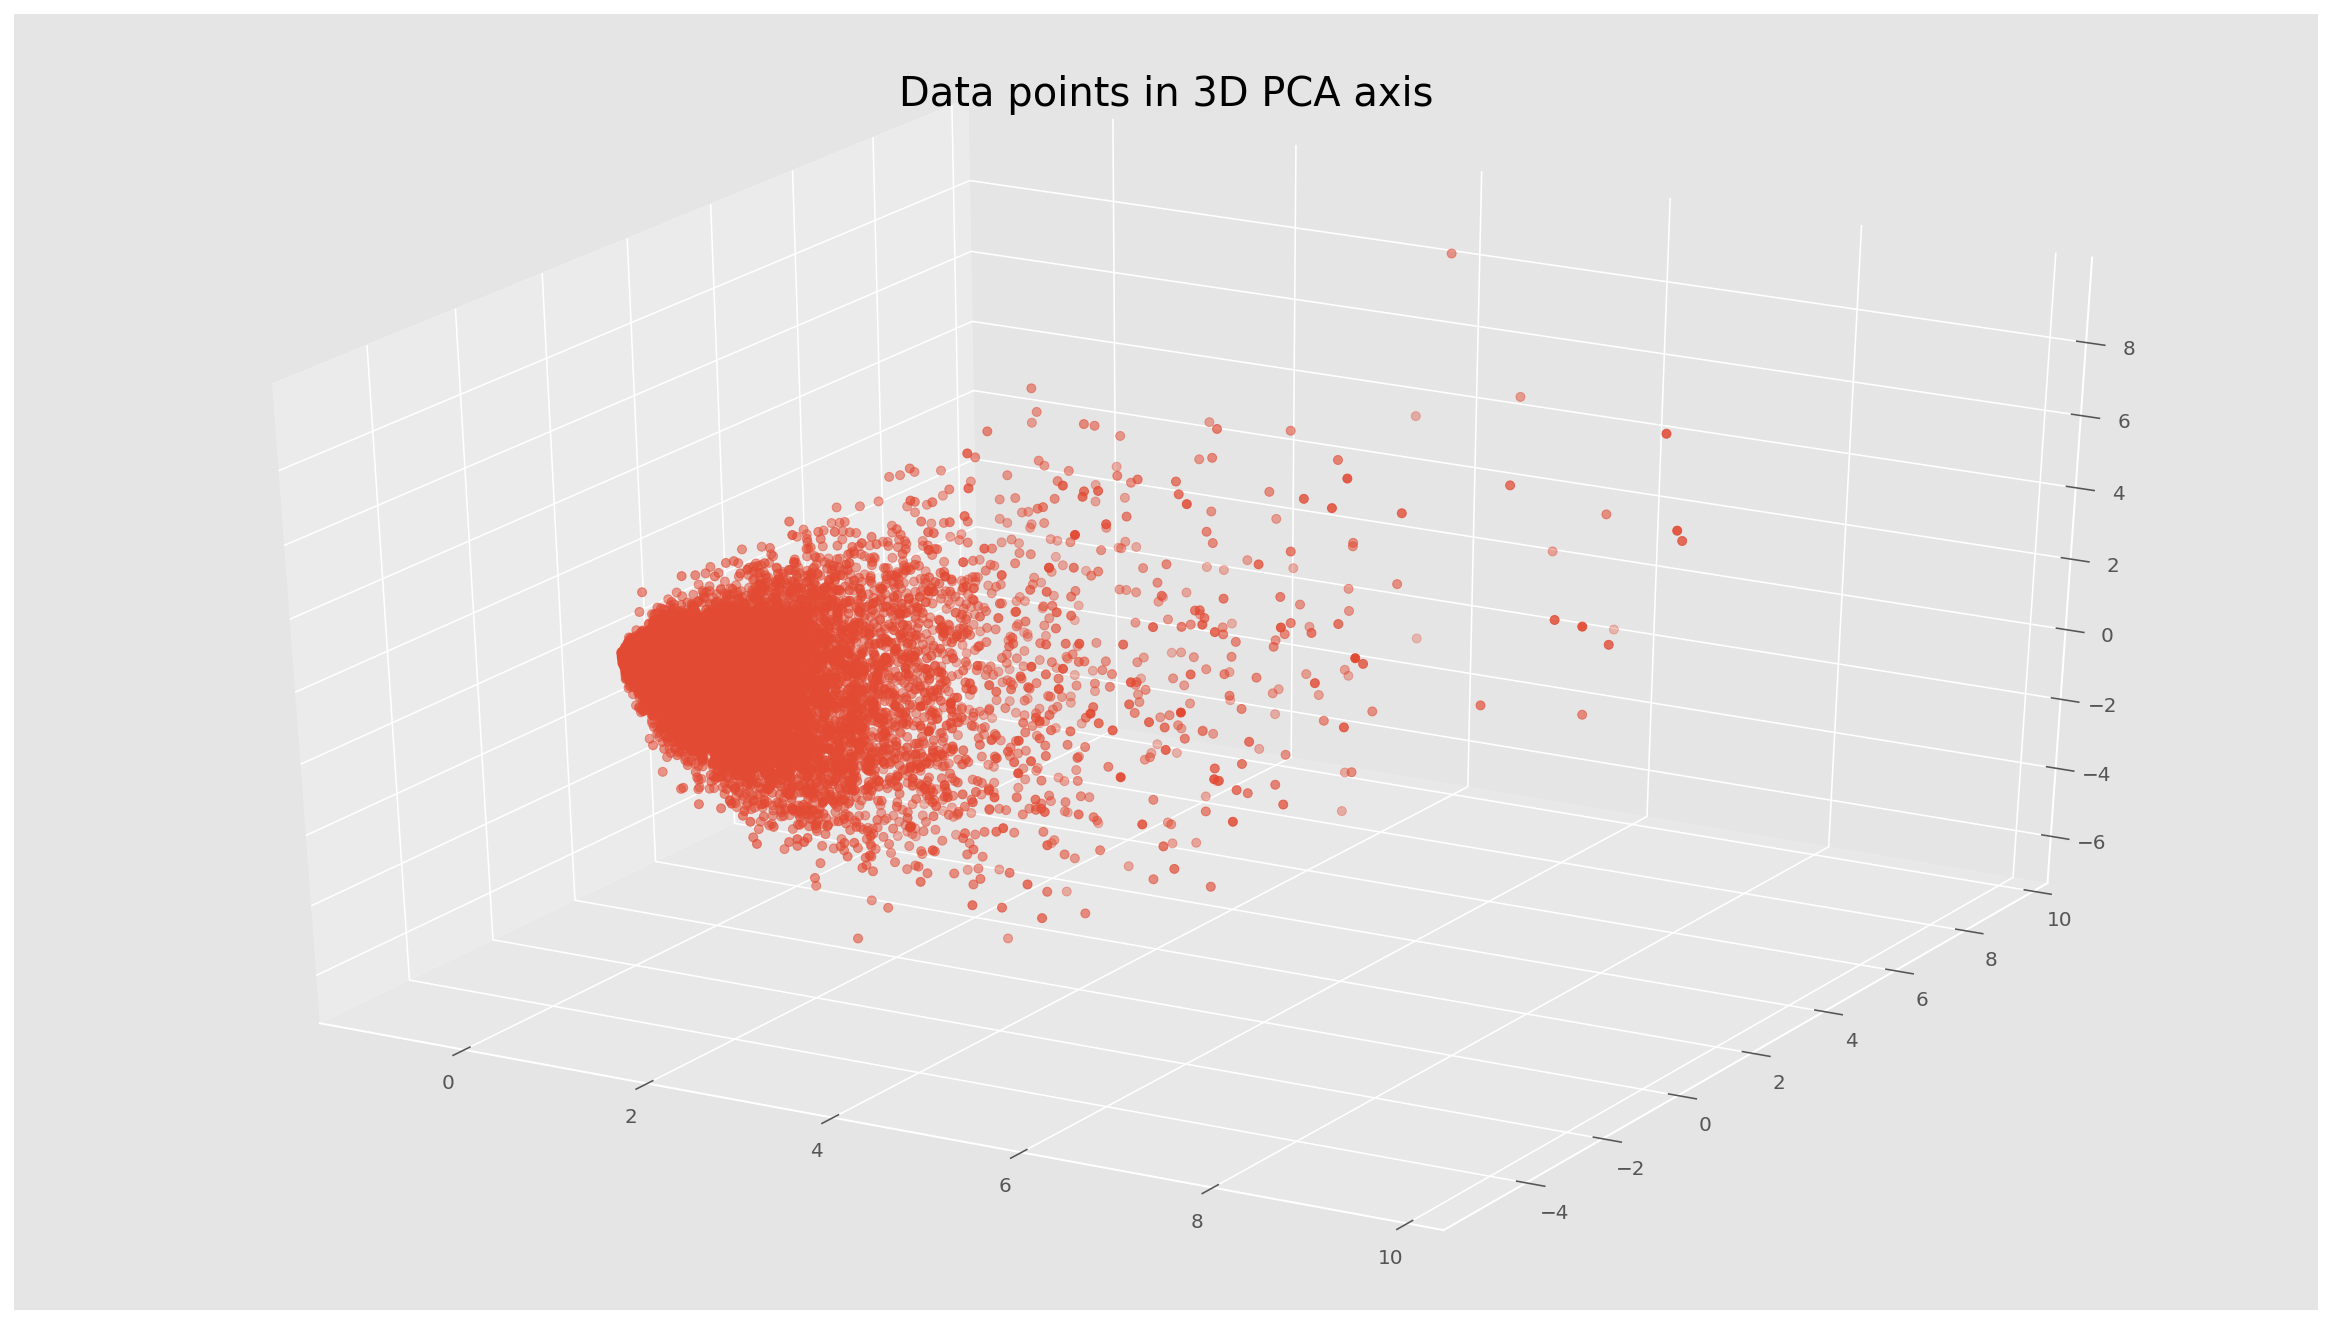

In [14]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

## Selecting number of K

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2, 8):
    # we will check cluster in range 2 to 8
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    print(inertia_list[i])
    scores.append(silhouette_score(tocluster, kmeans.labels_))
    print(scores)

46162.3356047705
[0.497867557741555]
35626.130691347294
[0.497867557741555, 0.5076529271062366]
27703.143759494866
[0.497867557741555, 0.5076529271062366, 0.5138879846967409]
24568.4638665286
[0.497867557741555, 0.5076529271062366, 0.5138879846967409, 0.49037739993730284]
22107.852260139374
[0.497867557741555, 0.5076529271062366, 0.5138879846967409, 0.49037739993730284, 0.4163235299019443]
20119.92054833845
[0.497867557741555, 0.5076529271062366, 0.5138879846967409, 0.49037739993730284, 0.4163235299019443, 0.4080461122409992]


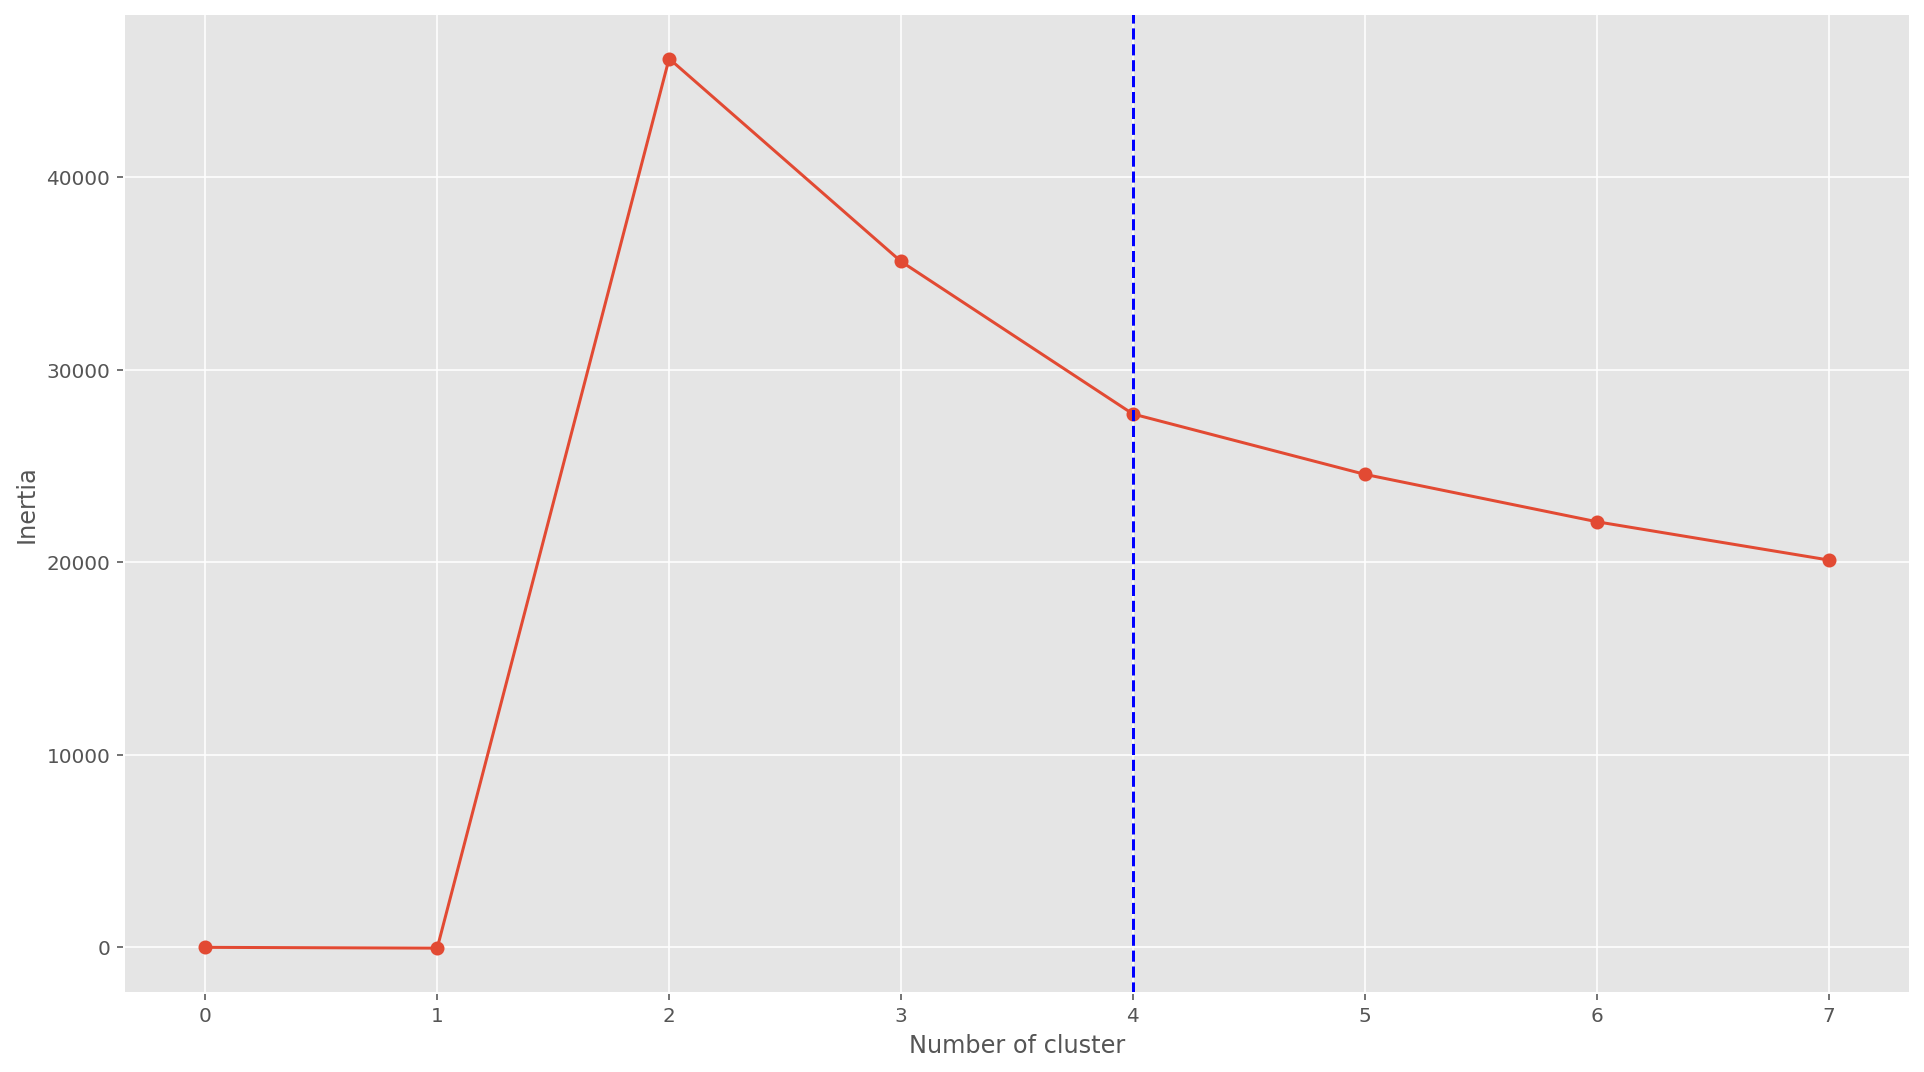

In [16]:
plt.plot(range(0, 8), inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

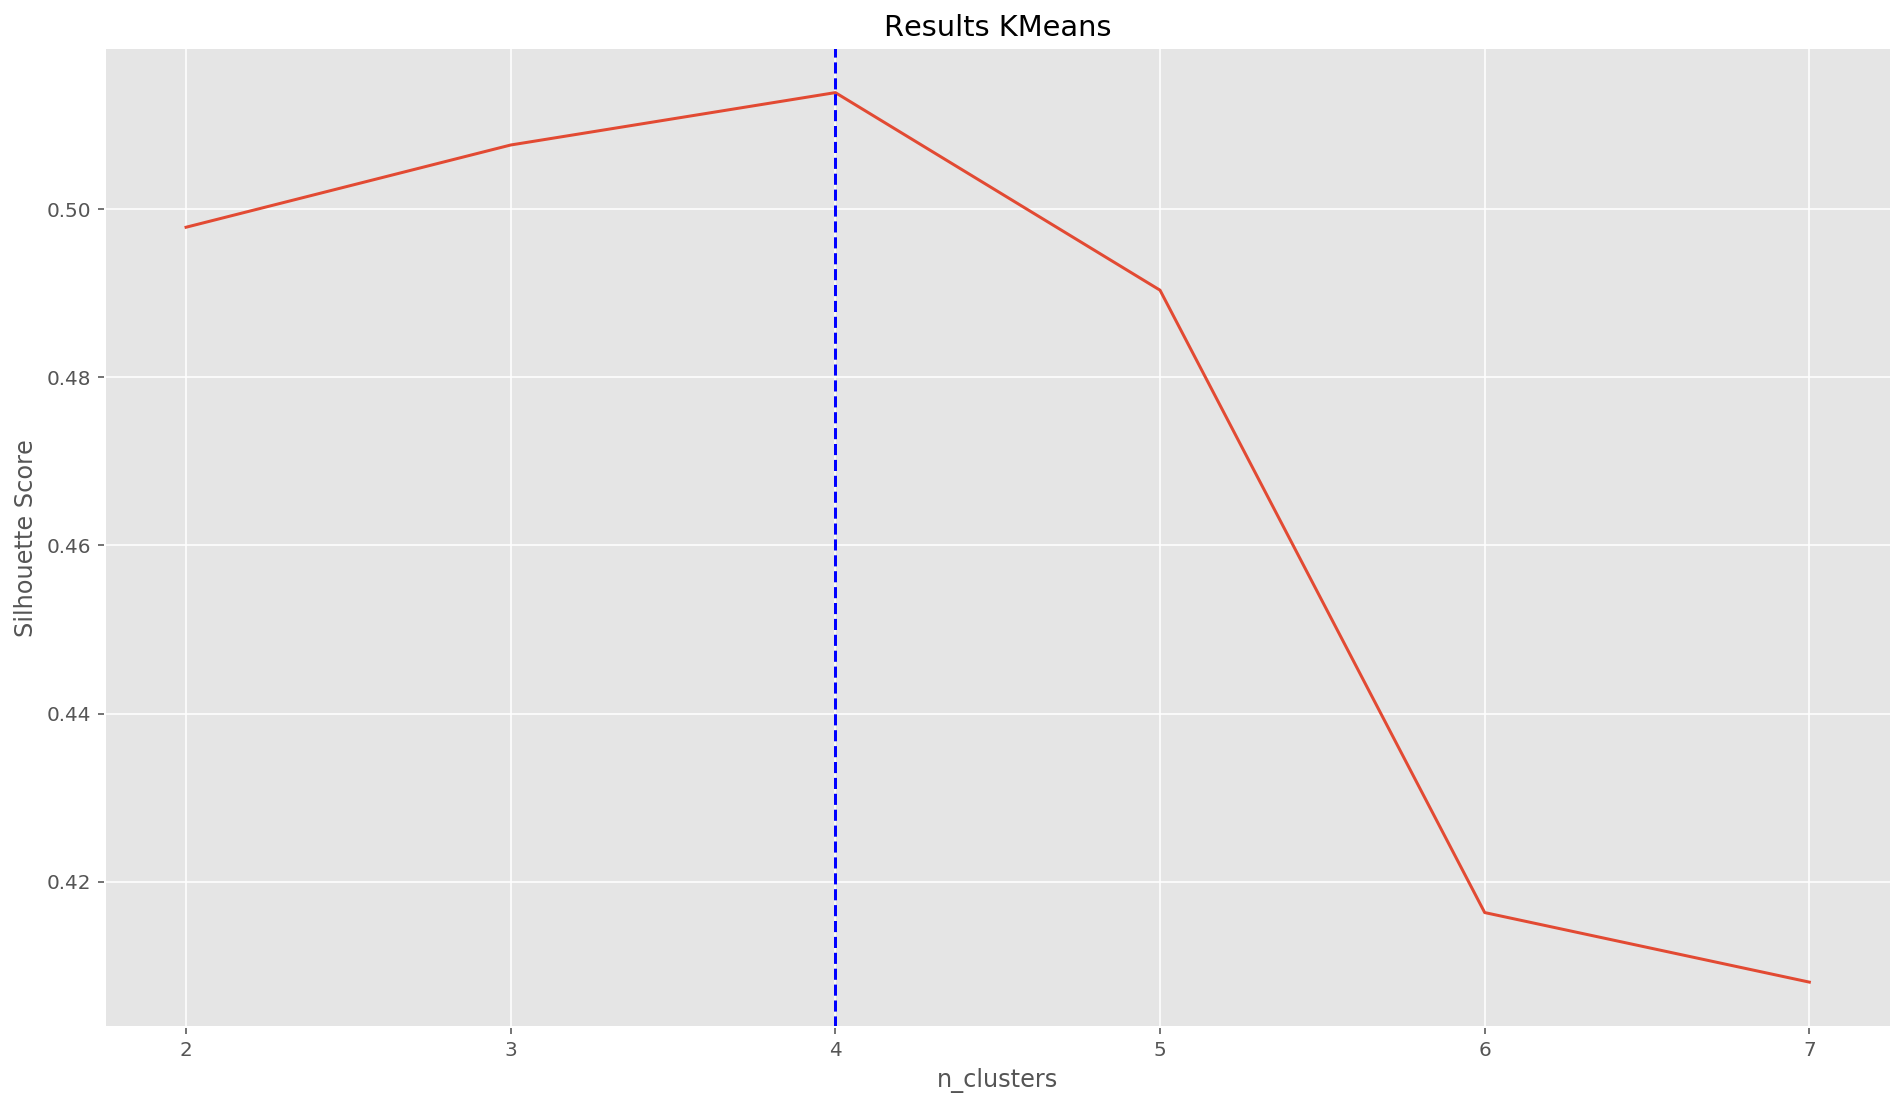

In [17]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

# K-Means Clustering (here we are clustering users)

In [18]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

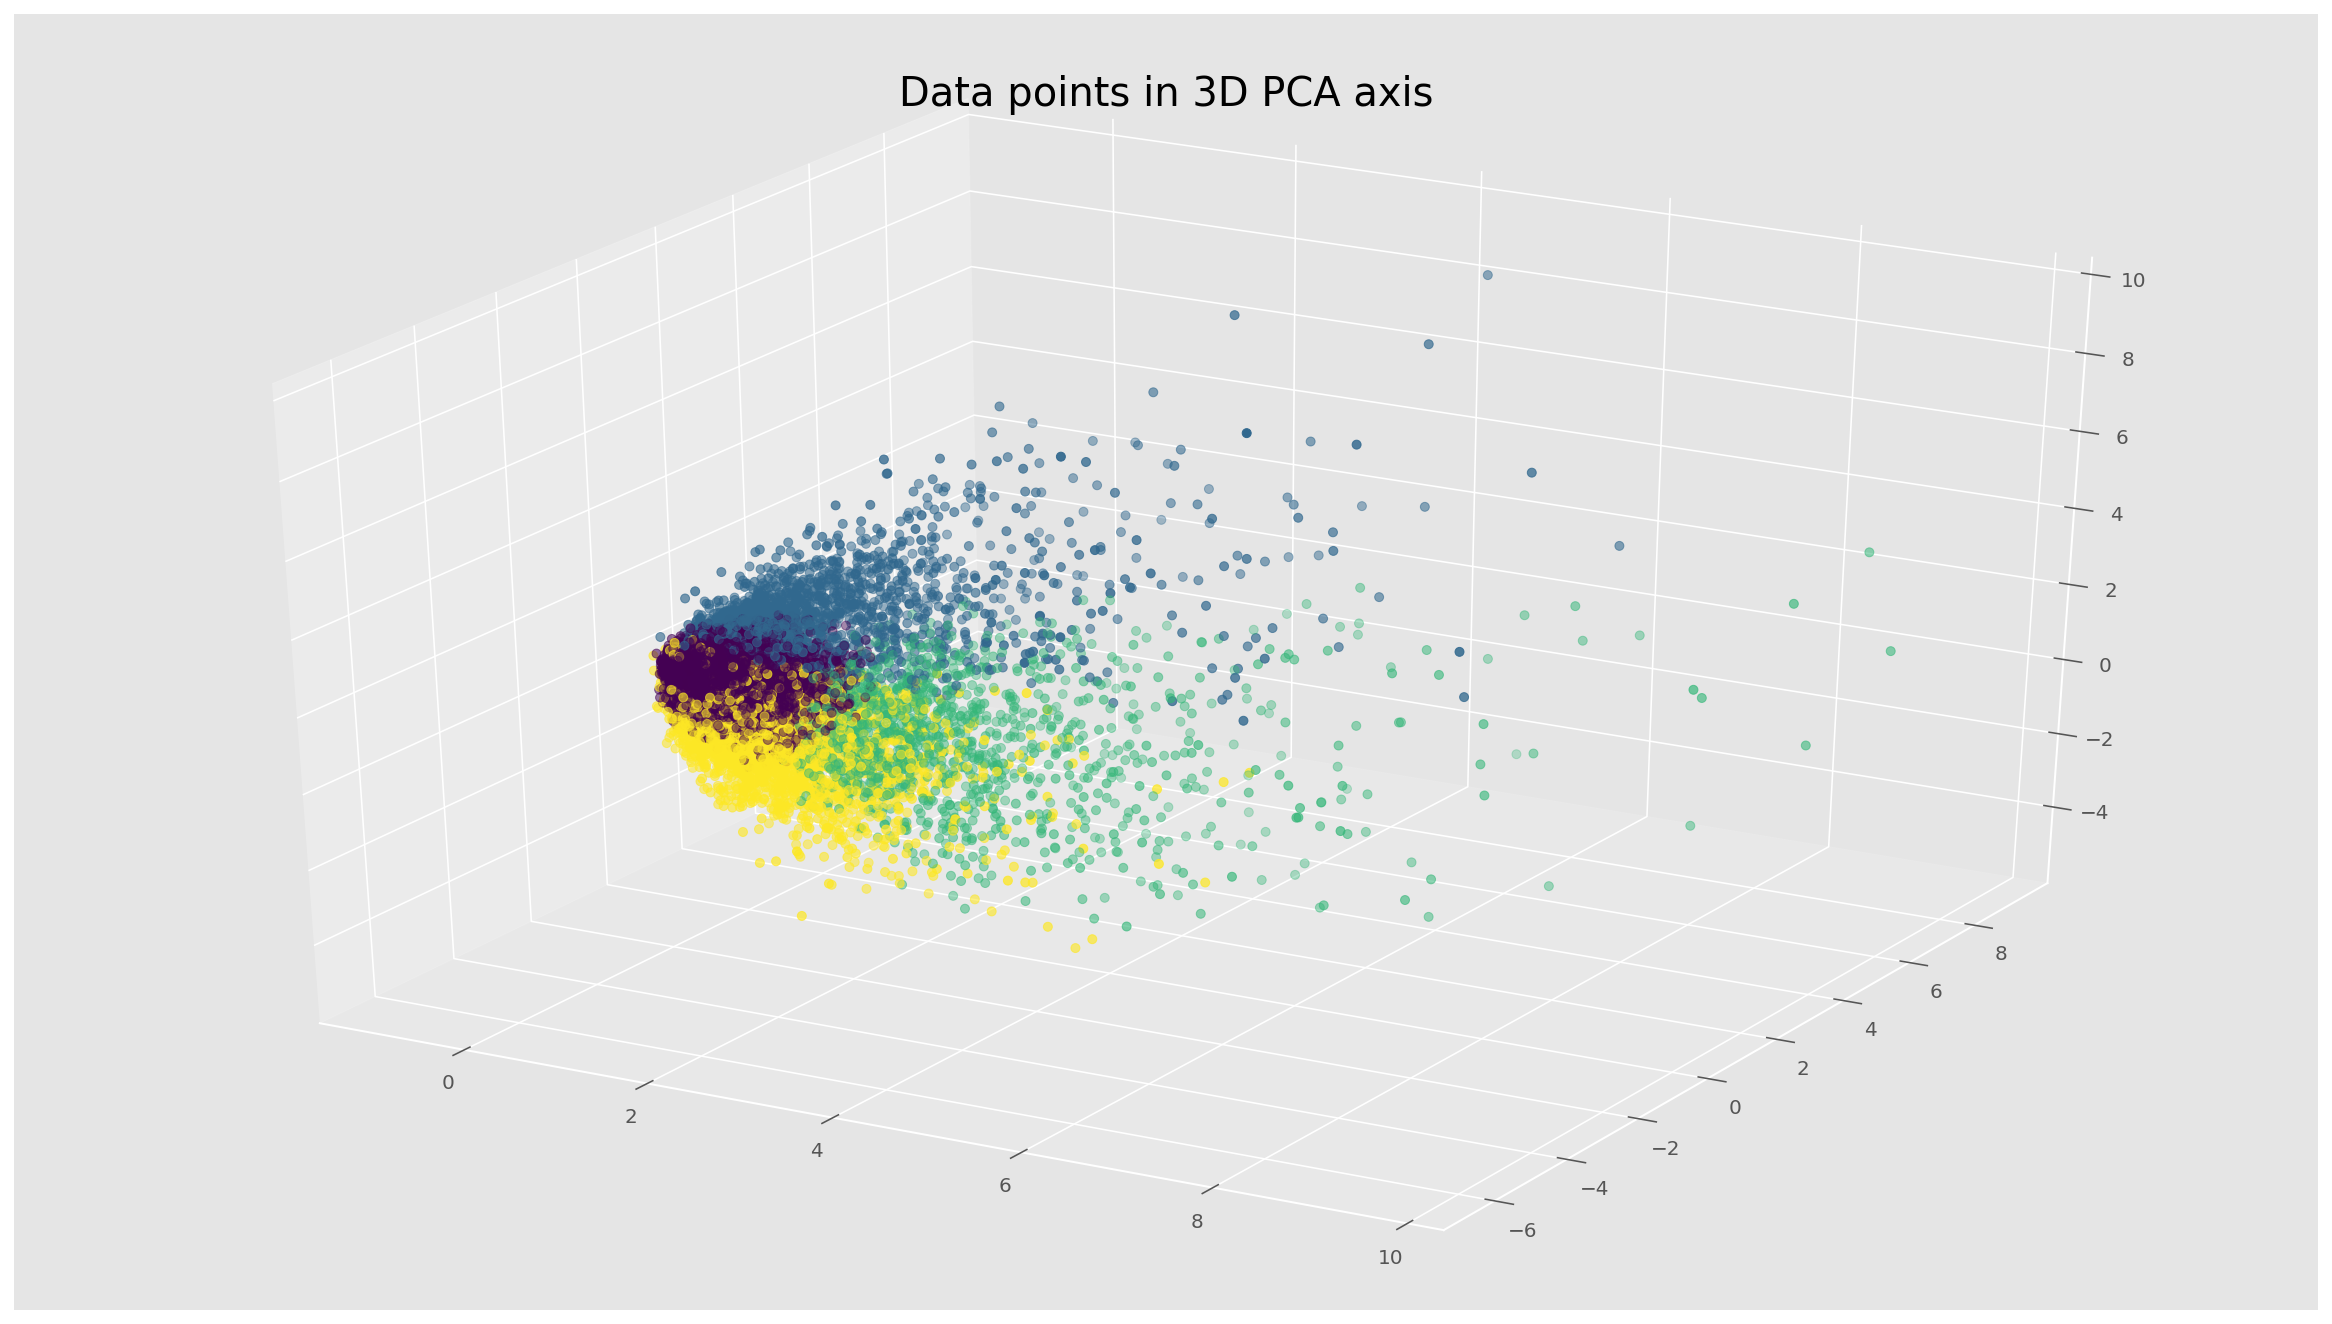

In [19]:
# 3d plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

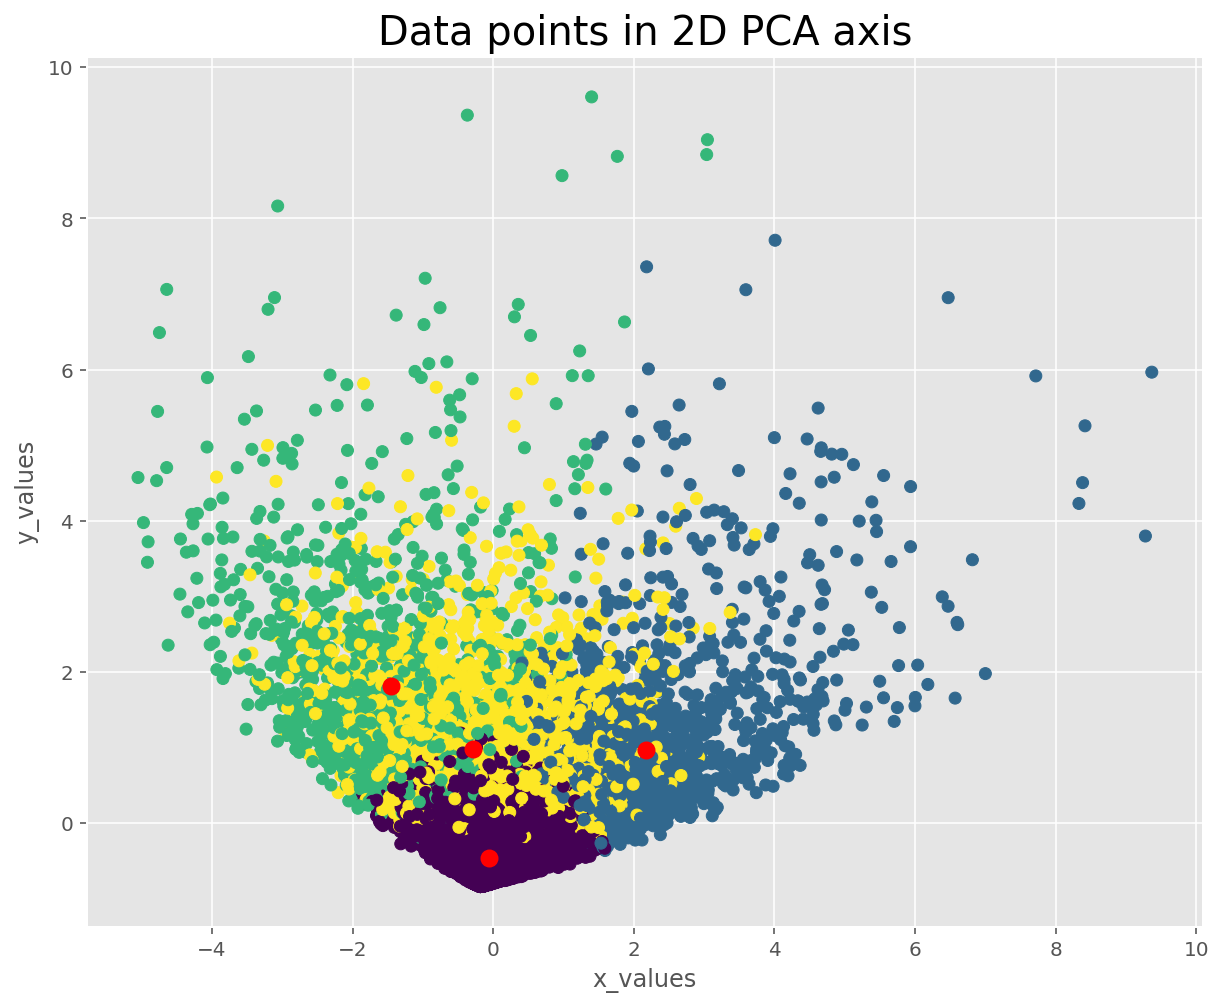

In [20]:
# 2d plot
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1], tocluster[0], c = c_preds)
for ci, c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [21]:
user_anime['cluster'] = c_preds

user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# here we calculate mean score for all movies in one cluster
# example c0 contains all movies in cluster 0 and their corresponding scores calculated by taking mean from all users
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [23]:
c0.sort_values(ascending=False)[0:5]

name
Death Note                          0.327109
Shingeki no Kyojin                  0.244339
Sword Art Online                    0.221765
Code Geass: Hangyaku no Lelouch     0.187835
Fullmetal Alchemist: Brotherhood    0.187139
dtype: float64

In [24]:
columns =  ['id', 'name', '0']

df0 = pd.DataFrame(c0)
df0 = pd.merge(anime, df0, on=['name','name'])
df0 = df0.drop(["genre", "type", "episodes", "rating", "members"], axis=1)
df0.columns = columns
df0

,id,name,0
0,32281,Kimi no Na wa.,0.007943
1,5114,Fullmetal Alchemist: Brotherhood,0.187139
2,28977,Gintama°,0.002717
3,9253,Steins;Gate,0.119766
4,9969,Gintama&#039;,0.014213
...,...,...,...
7847,3910,Kyuukyoku no Sex Adventure Kamasutra,0.000000
7848,4601,Fairy Forest Remi-chan,0.000000
7849,5545,Heisei Jogakuen Kagai Lesson,0.000000
7850,2240,Sei Michaela Gakuen Hyouryuuki II,0.000070


In [25]:
columns =  ['id', 'name', '1']

df1 = pd.DataFrame(c1)
df1 = pd.merge(anime, df1, on=['name','name'])
df1 = df1.drop(["genre", "type", "episodes", "rating", "members"], axis=1)
df1.columns = columns
df1

,id,name,1
0,32281,Kimi no Na wa.,0.013019
1,5114,Fullmetal Alchemist: Brotherhood,0.460012
2,28977,Gintama°,0.018599
3,9253,Steins;Gate,0.322381
4,9969,Gintama&#039;,0.091135
...,...,...,...
7847,3910,Kyuukyoku no Sex Adventure Kamasutra,0.001240
7848,4601,Fairy Forest Remi-chan,0.000620
7849,5545,Heisei Jogakuen Kagai Lesson,0.000620
7850,2240,Sei Michaela Gakuen Hyouryuuki II,0.000000


In [26]:
columns =  ['id', 'name', '2']

df2 = pd.DataFrame(c2)
df2 = pd.merge(anime, df2, on=['name','name'])
df2 = df2.drop(["genre", "type", "episodes", "rating", "members"], axis=1)
df2.columns = columns
df2

,id,name,2
0,32281,Kimi no Na wa.,0.065022
1,5114,Fullmetal Alchemist: Brotherhood,0.482810
2,28977,Gintama°,0.043348
3,9253,Steins;Gate,0.470105
4,9969,Gintama&#039;,0.085202
...,...,...,...
7847,3910,Kyuukyoku no Sex Adventure Kamasutra,0.000000
7848,4601,Fairy Forest Remi-chan,0.000000
7849,5545,Heisei Jogakuen Kagai Lesson,0.000000
7850,2240,Sei Michaela Gakuen Hyouryuuki II,0.000000


In [27]:
columns =  ['id', 'name', '3']

df3 = pd.DataFrame(c3)
df3 = pd.merge(anime, df3, on=['name','name'])
df3 = df3.drop(["genre", "type", "episodes", "rating", "members"], axis=1)
df3.columns = columns
df3

,id,name,3
0,32281,Kimi no Na wa.,0.112760
1,5114,Fullmetal Alchemist: Brotherhood,0.665801
2,28977,Gintama°,0.076409
3,9253,Steins;Gate,0.694733
4,9969,Gintama&#039;,0.115727
...,...,...,...
7847,3910,Kyuukyoku no Sex Adventure Kamasutra,0.000371
7848,4601,Fairy Forest Remi-chan,0.000000
7849,5545,Heisei Jogakuen Kagai Lesson,0.000000
7850,2240,Sei Michaela Gakuen Hyouryuuki II,0.000000


In [28]:
new_df = pd.merge(df0, df1, on=['name','name'])
new_df = pd.merge(new_df, df2, on=['name','name'])
new_df = pd.merge(new_df, df3, on=['name','name'])
new_df = pd.merge(new_df, anime, on=['name', 'name'])
new_df = new_df.drop(["genre", "type", "episodes", "rating", "members", "id_x", "id_y"], axis=1)
new_df

,name,0,1,2,3,anime_id
0,Kimi no Na wa.,0.007943,0.013019,0.065022,0.112760,32281
1,Fullmetal Alchemist: Brotherhood,0.187139,0.460012,0.482810,0.665801,5114
2,Gintama°,0.002717,0.018599,0.043348,0.076409,28977
3,Steins;Gate,0.119766,0.322381,0.470105,0.694733,9253
4,Gintama&#039;,0.014213,0.091135,0.085202,0.115727,9969
...,...,...,...,...,...,...
7847,Kyuukyoku no Sex Adventure Kamasutra,0.000000,0.001240,0.000000,0.000371,3910
7848,Fairy Forest Remi-chan,0.000000,0.000620,0.000000,0.000000,4601
7849,Heisei Jogakuen Kagai Lesson,0.000000,0.000620,0.000000,0.000000,5545
7850,Sei Michaela Gakuen Hyouryuuki II,0.000070,0.000000,0.000000,0.000000,2240


In [29]:
cols = new_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['anime_id', 'name', '0', '1', '2', '3']

In [30]:
new_df = new_df[cols]
new_df

,anime_id,name,0,1,2,3
0,32281,Kimi no Na wa.,0.007943,0.013019,0.065022,0.112760
1,5114,Fullmetal Alchemist: Brotherhood,0.187139,0.460012,0.482810,0.665801
2,28977,Gintama°,0.002717,0.018599,0.043348,0.076409
3,9253,Steins;Gate,0.119766,0.322381,0.470105,0.694733
4,9969,Gintama&#039;,0.014213,0.091135,0.085202,0.115727
...,...,...,...,...,...,...
7847,3910,Kyuukyoku no Sex Adventure Kamasutra,0.000000,0.001240,0.000000,0.000371
7848,4601,Fairy Forest Remi-chan,0.000000,0.000620,0.000000,0.000000
7849,5545,Heisei Jogakuen Kagai Lesson,0.000000,0.000620,0.000000,0.000000
7850,2240,Sei Michaela Gakuen Hyouryuuki II,0.000070,0.000000,0.000000,0.000000


In [31]:
new_df.to_csv('clusters.csv', index=False)